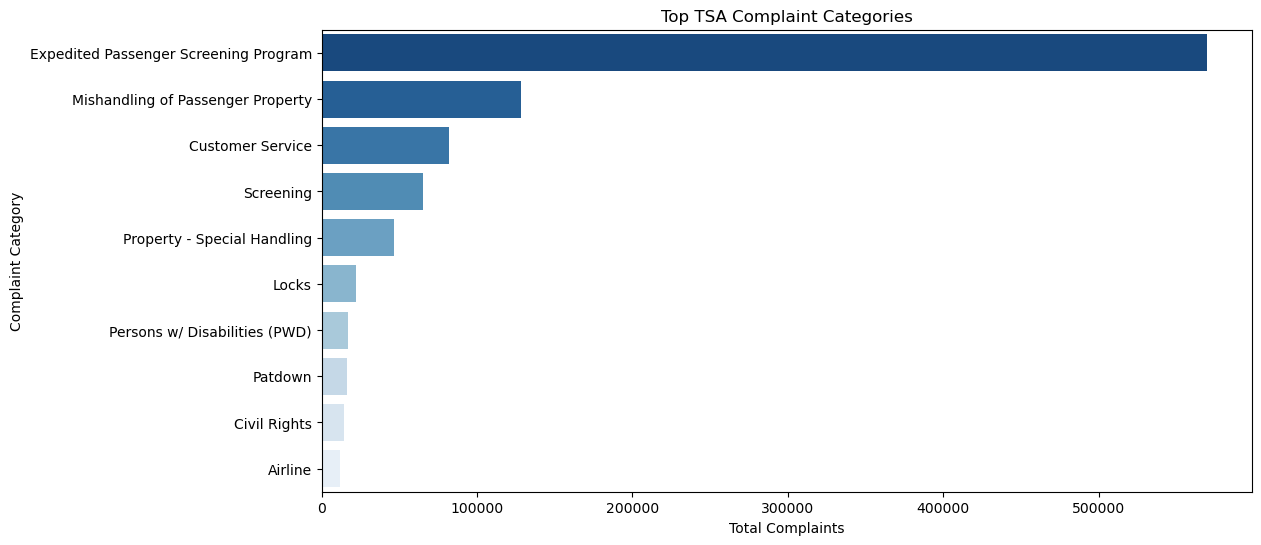

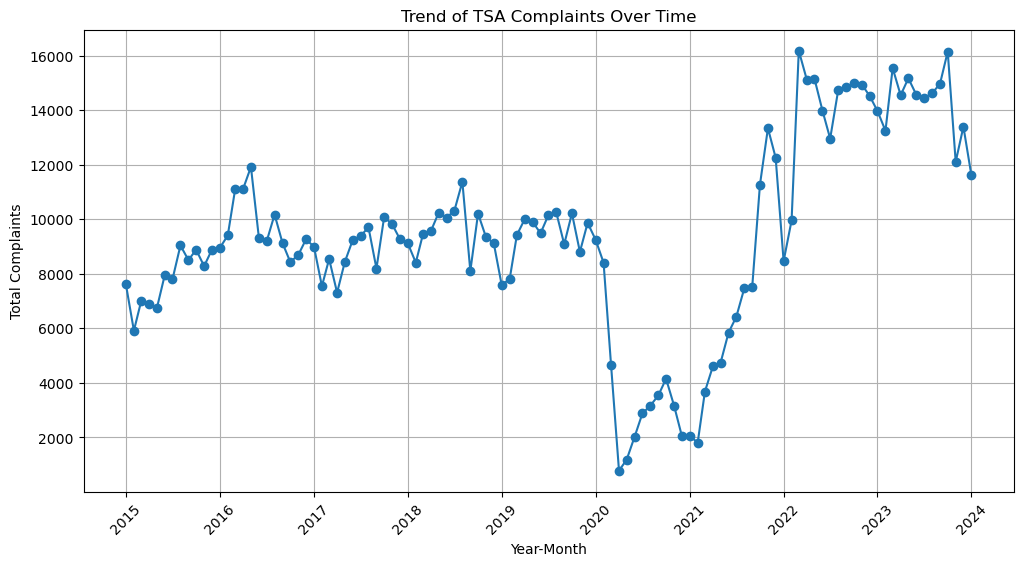

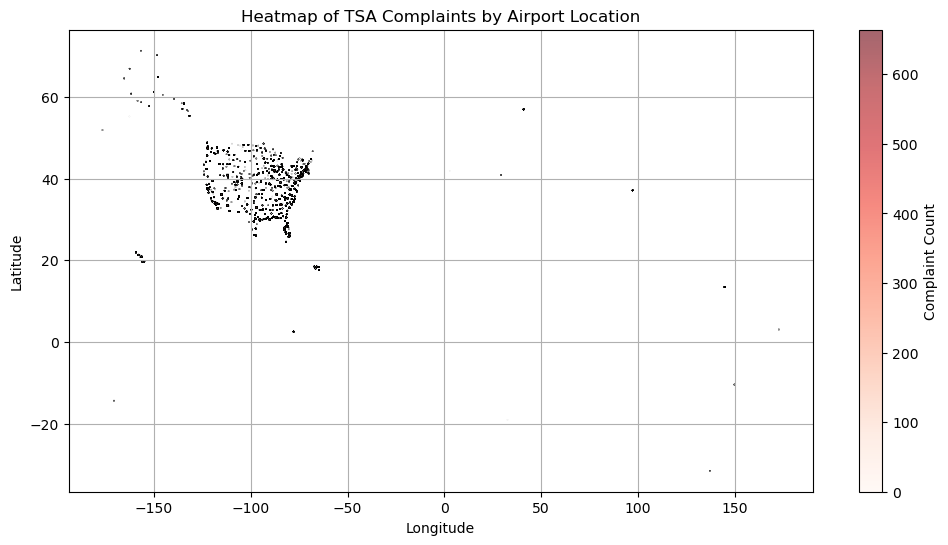

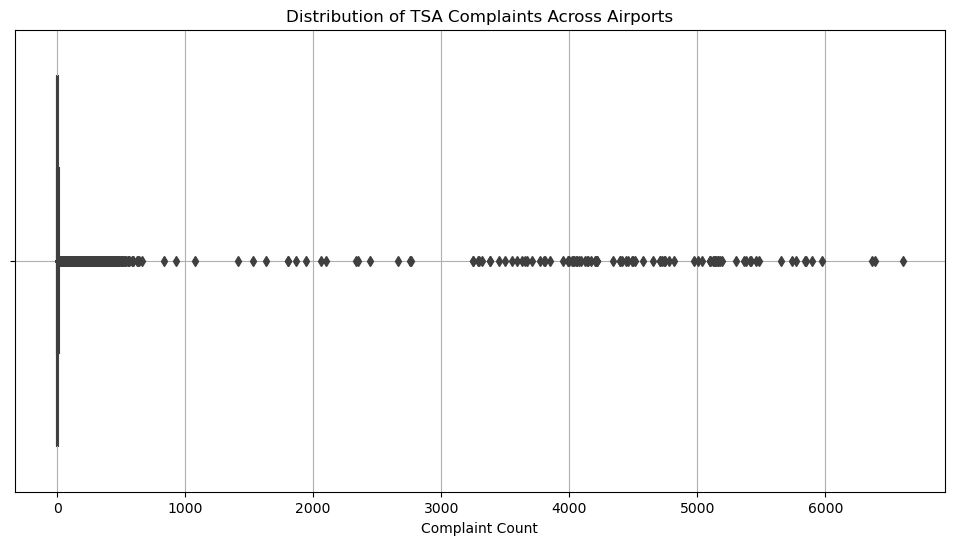

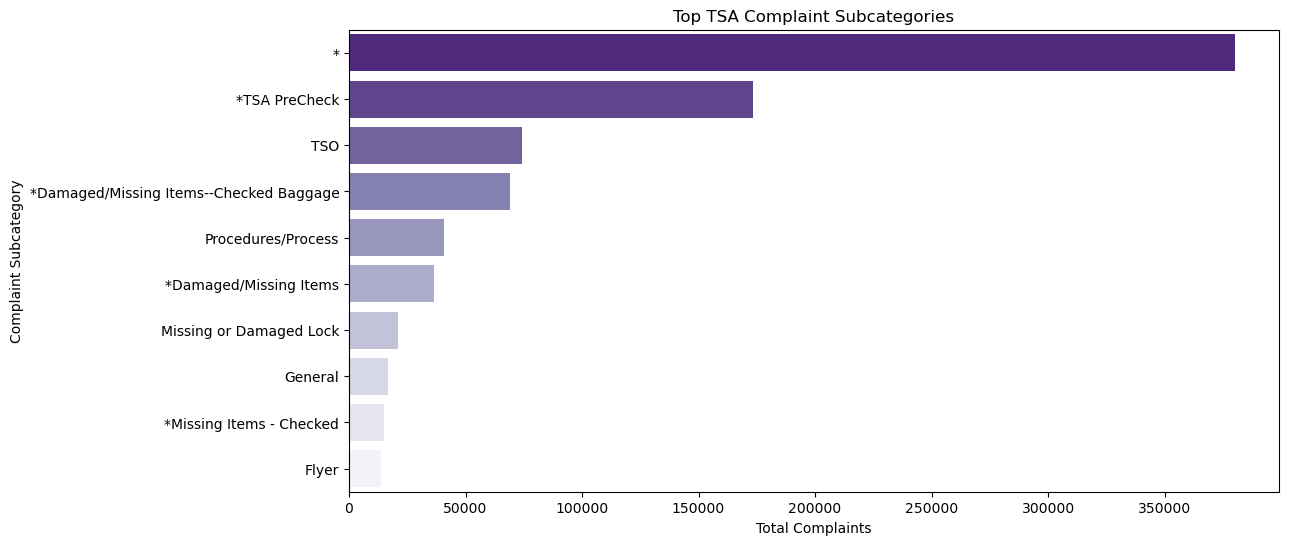

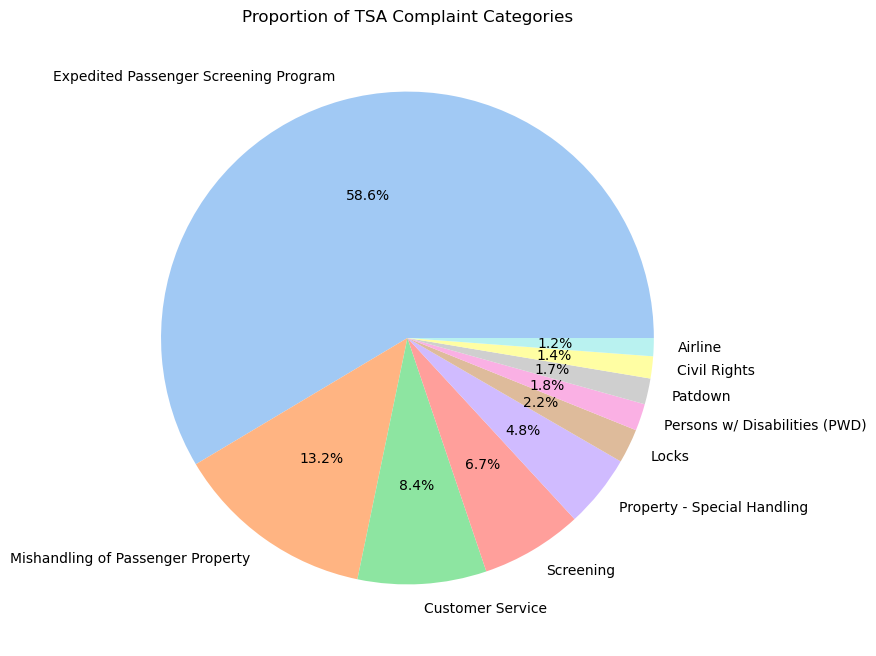

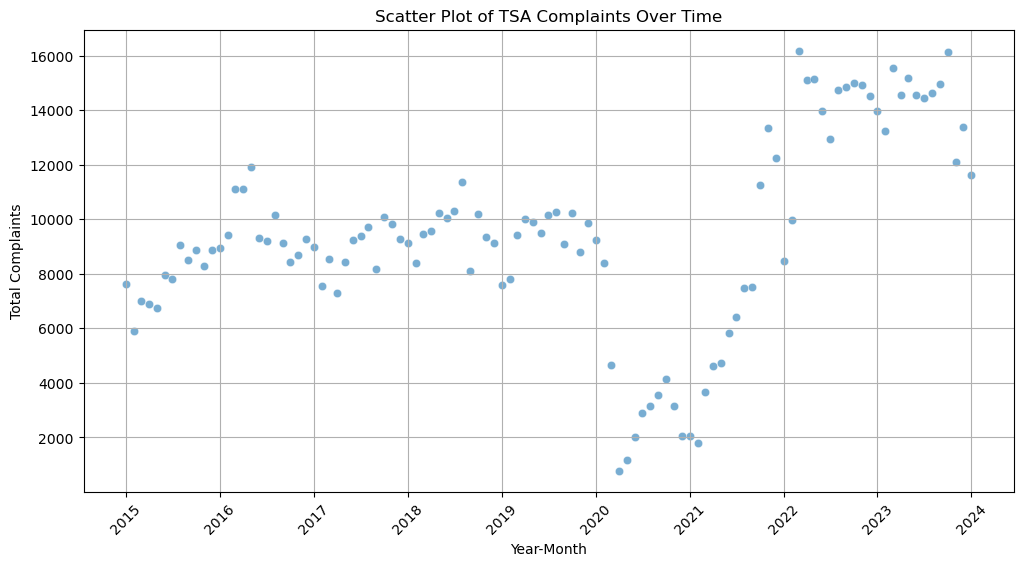

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load datasets
complaints_by_airport = pd.read_csv("/Users/mattgarlock/Downloads/complaints-by-airport.csv")
complaints_by_category = pd.read_csv("/Users/mattgarlock/Downloads/complaints-by-category.csv")
complaints_by_subcategory = pd.read_csv("/Users/mattgarlock/Downloads/complaints-by-subcategory.csv")
iata_icao = pd.read_csv("/Users/mattgarlock/Downloads/iata-icao.csv")

# Merge datasets to add airport names and locations
merged_complaints_airport = complaints_by_airport.merge(
    iata_icao[['iata', 'airport', 'latitude', 'longitude']], 
    left_on='airport', 
    right_on='iata', 
    how='left'
)

# Merge subcategory complaints with airport data
merged_complaints_subcategory = complaints_by_subcategory.merge(
    iata_icao[['iata', 'airport', 'latitude', 'longitude']], 
    left_on='airport', 
    right_on='iata', 
    how='left'
)

# Aggregate total complaints by airport
top_airports_complaints = merged_complaints_airport.groupby(
    ['airport_y', 'iata']
)['count'].sum().reset_index()
top_airports_complaints = top_airports_complaints.sort_values(by='count', ascending=False).head(10)

# Bar chart of top complaint categories
complaints_by_category['clean_cat'] = complaints_by_category['clean_cat'].fillna('Unknown')
top_complaint_categories = complaints_by_category.groupby('clean_cat')['count'].sum().reset_index()
top_complaint_categories = top_complaint_categories.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_complaint_categories, x='count', y='clean_cat', palette='Blues_r')
plt.xlabel("Total Complaints")
plt.ylabel("Complaint Category")
plt.title("Top TSA Complaint Categories")
plt.show()

# Trend of complaints over time
merged_complaints_airport['year_month'] = pd.to_datetime(merged_complaints_airport['year_month'])
complaints_over_time = merged_complaints_airport.groupby('year_month')['count'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(complaints_over_time['year_month'], complaints_over_time['count'], marker='o', linestyle='-')
plt.xlabel("Year-Month")
plt.ylabel("Total Complaints")
plt.title("Trend of TSA Complaints Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap of complaints by airport location
geo_df_clean = merged_complaints_airport.dropna(subset=['latitude', 'longitude'])
plt.figure(figsize=(12, 6))
plt.scatter(geo_df_clean['longitude'], geo_df_clean['latitude'], 
            s=geo_df_clean['count'] / 500, c=geo_df_clean['count'], 
            cmap='Reds', alpha=0.6, edgecolors="black")
plt.colorbar(label="Complaint Count")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of TSA Complaints by Airport Location")
plt.grid(True)
plt.show()

# Box plot of complaint distribution across airports
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_complaints_airport, x='count')
plt.xlabel("Complaint Count")
plt.title("Distribution of TSA Complaints Across Airports")
plt.grid(True)
plt.show()

# Additional Visual 1: Line Chart of Subcategory Trends
top_subcategories = merged_complaints_subcategory.groupby('clean_subcat')['count'].sum().reset_index()
top_subcategories = top_subcategories.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_subcategories, x='count', y='clean_subcat', palette='Purples_r')
plt.xlabel("Total Complaints")
plt.ylabel("Complaint Subcategory")
plt.title("Top TSA Complaint Subcategories")
plt.show()

# Additional Visual 2: Pie Chart of Complaint Distribution by Category
plt.figure(figsize=(8, 8))
plt.pie(top_complaint_categories['count'], labels=top_complaint_categories['clean_cat'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Proportion of TSA Complaint Categories")
plt.show()

# Additional Visual 3: Scatter Plot of Complaints vs. Time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=complaints_over_time, x='year_month', y='count', alpha=0.6)
plt.xlabel("Year-Month")
plt.ylabel("Total Complaints")
plt.title("Scatter Plot of TSA Complaints Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
